<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# ES8 MAI - Filtros digitales
#### Alumno: Matias Pardo Errecarret

## Consigna Cuadripolos:
<img src="./consigna.png" align="center"  />

## Analisis de Cuadripolos - Transferencia de tension
## 1.

In [23]:
from IPython.display import IFrame
IFrame("./Analisis_cuadripolos.pdf", width=900, height=1000)

In [22]:
import sympy as sp
from sympy.abc import s #importamos simbolo s
from IPython.display import display, Math

#Declaro simbolos variables
Vi, Vo = sp.symbols("Vi, Vo")
Za, Zb, Zc, Yl, L1, L2, Rl, C = sp.symbols("Za, Zb, Zc, Yl, L1, L2, Rl, C")

#Red 1 Parametros Z
Z11 = Za + Zb
Z12 = Zb
Z21 = Zb
Z22 = Zc + Zb

#Red 1 Parametros T
A_1 = Z11/Z21
B_1 = ((Z11*Z22)-(Z21*Z12))/Z21
C_1 = 1/Z21
D_1 = Z22/Z21

#Chequeos intermedios
#cancel() will take any rational function and put it into the standard canonical form
#B_1 = sp.cancel(B_1)
#display(B_1)

#Red 2
A_2 = 1
B_2 = 0
C_2 = 1/Rl
D_2 = 1

A_tot = A_1 * A_2 + B_1 * C_2

Av_tot = 1/A_tot

#Chequeos intermedios
#Av_tot = sp.cancel(Av_tot)
#display(Av_tot)

#Reemplazo por los componentes
Av_tot = Av_tot.subs([(Za, s*L1), (Zb, 1/(s*C)),(Zc, s*L2)])

num, den = sp.fraction(Av_tot)

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

Av_tot = sp.Mul(k,num/den, evaluate=True)

display(Av_tot)

Rl/(C*L1*L2*(s**3 + Rl*s**2/L2 + Rl/(C*L1*L2) + s*(L1 + L2)/(C*L1*L2)))

### Simulacion Numerica

<IPython.core.display.Math object>

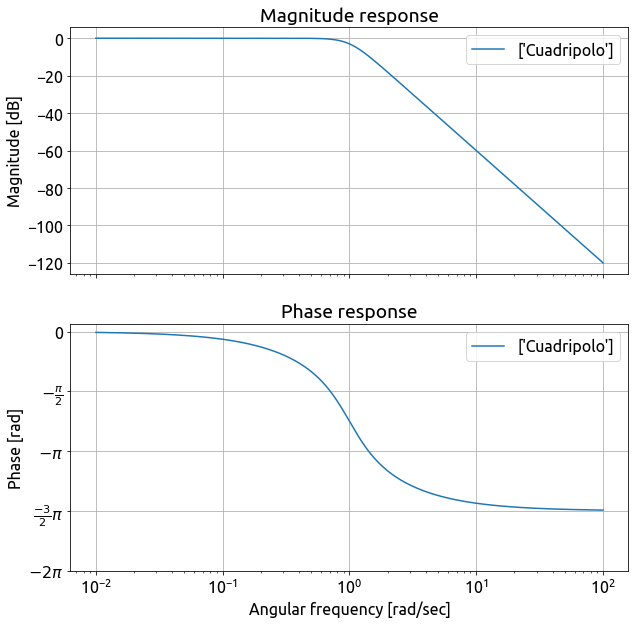

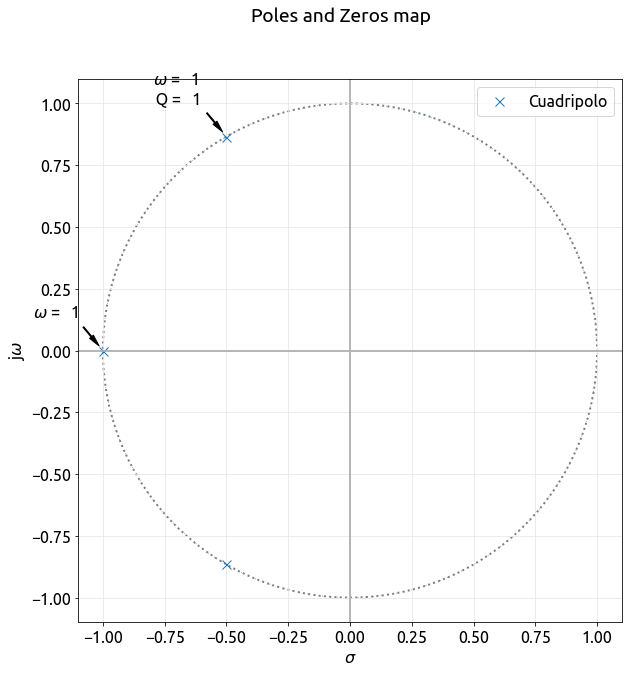

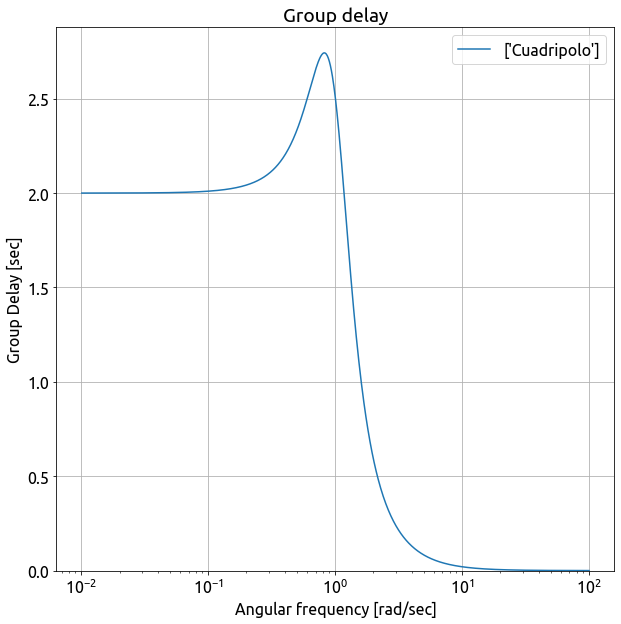

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_lti, pretty_print_SOS

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

all_sos = []
L1 = 1.5
C = 4/3
L2 = 0.5
R = 1

num = [R/(L1*L2*C)]
den = [1,R/L2,(L1+L2)/(L1*L2*C),R/(L1*L2*C)]

mi_sos = sig.TransferFunction(num,den)

pretty_print_lti(mi_sos)

analyze_sys([mi_sos],['Cuadripolo'])


## Analisis de Cuadripolos - Simulacion Circuital
## 2.

<img src="./1_tf_spice.png" align="center"  />

## Analisis matricial - MAI

In [29]:
IFrame("./Analisis_MAI.pdf", width=900, height=1000)

## Consigna Filtros Digitales - TP5 Eje2:
<img src="./consigna_2.png" align="left"  />

In [53]:
IFrame("./Analisis_FiltroDigitalLP.pdf", width=900, height=1000)

<IPython.core.display.Math object>

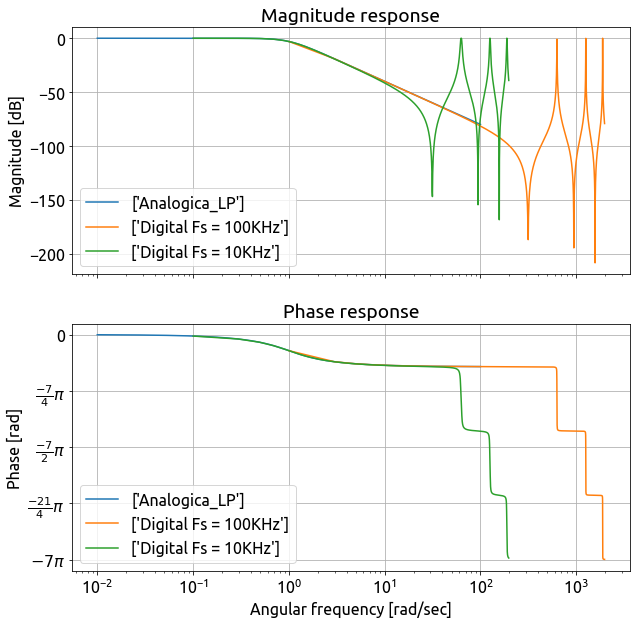

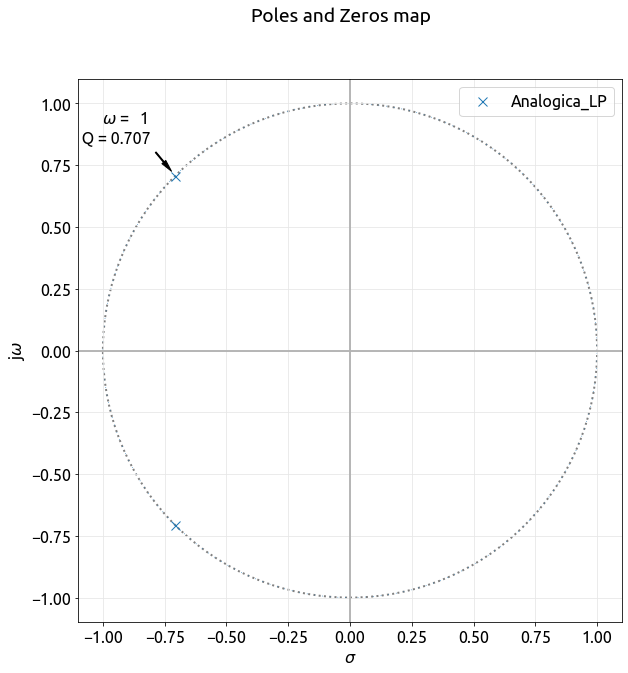

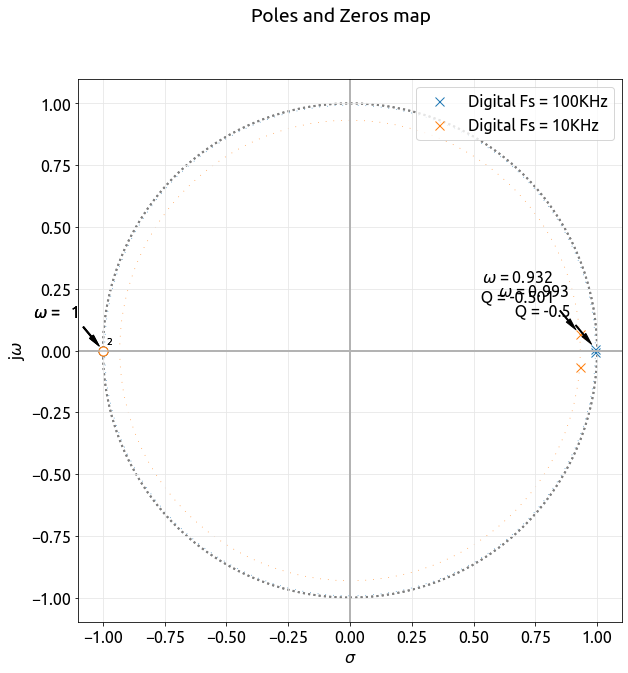

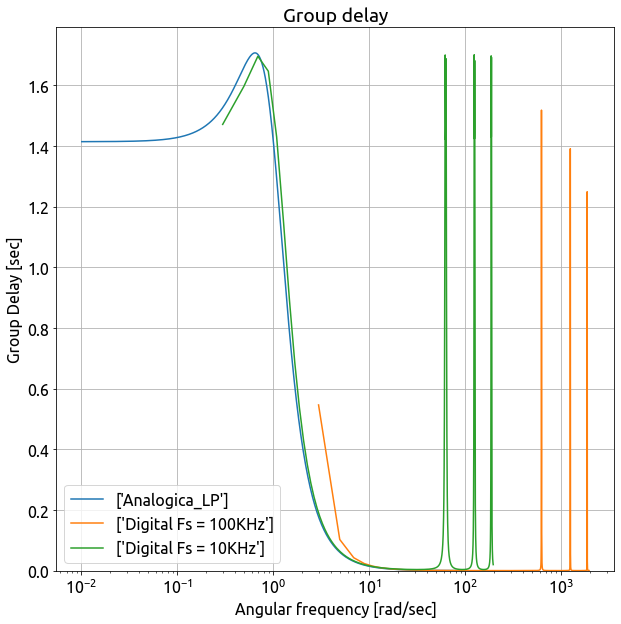

In [46]:
fc = 1e3
wo = 2*np.pi*fc
norm_w = wo
norm_f = fc
fsampling_1 = 100e3
fsampling_2 = 10e3

wo_norm = wo/norm_w
fsampling_1_norm = fsampling_1/norm_f
fsampling_2_norm = fsampling_2/norm_f

q_butter = 1/np.sqrt(2)

num = [wo_norm]
den = [1,wo_norm/q_butter,wo_norm**2]

tf_analogica = sig.TransferFunction(num,den)

numz_1, denz_1 = sig.bilinear(num, den, fs=fsampling_1_norm)
tf_digital_1 = sig.TransferFunction(numz_1,denz_1,dt=1/fsampling_1_norm)

numz_2, denz_2 = sig.bilinear(num, den, fs=fsampling_2_norm)
tf_digital_2 = sig.TransferFunction(numz_2,denz_2,dt=1/fsampling_2_norm)


analyze_sys([tf_analogica,tf_digital_1,tf_digital_2],['Analogica_LP','Digital Fs = 100KHz','Digital Fs = 10KHz'])

A tener en cuenta: Para los graficos digitales se debe tomar como valido hasta el $\Omega = {\pi*fs_{norm}}$ 

### PasaAltos Digital

<IPython.core.display.Math object>

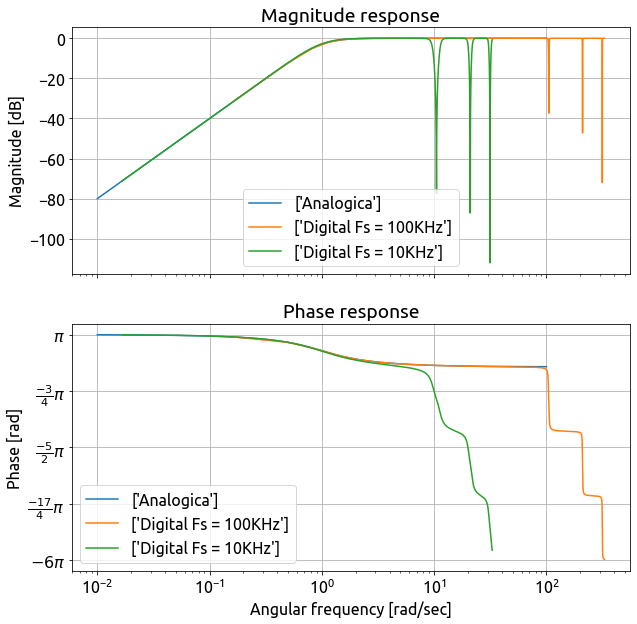

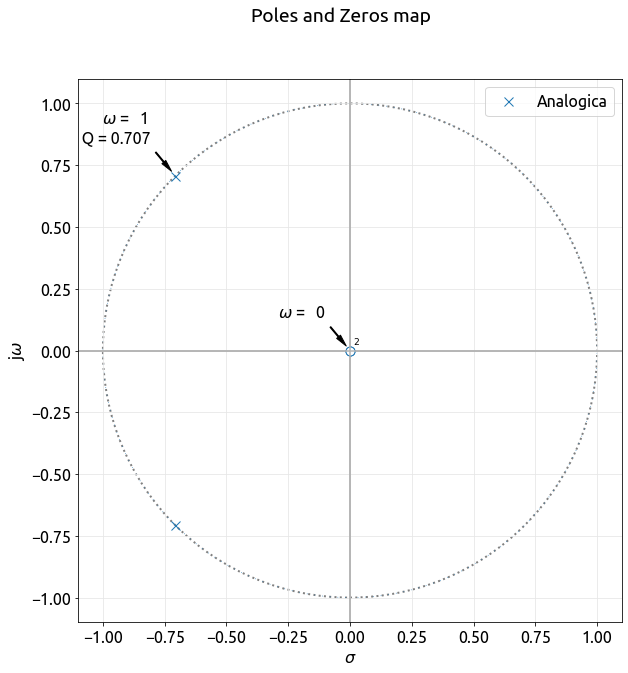

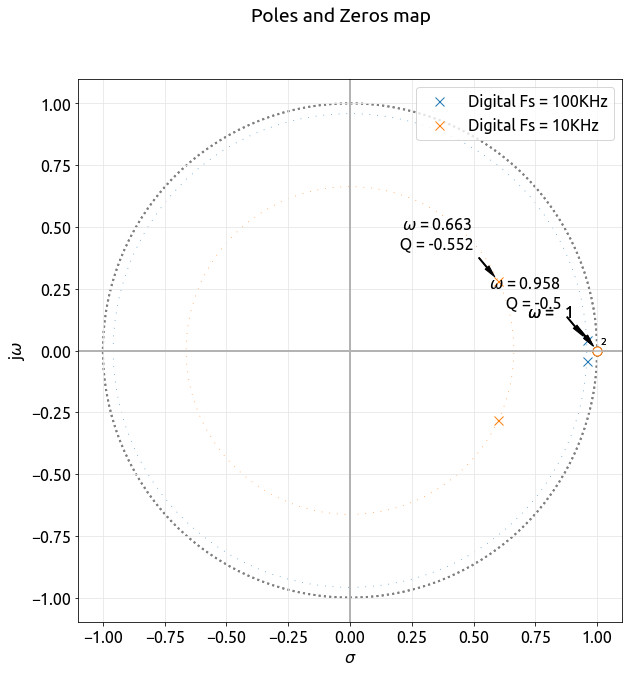

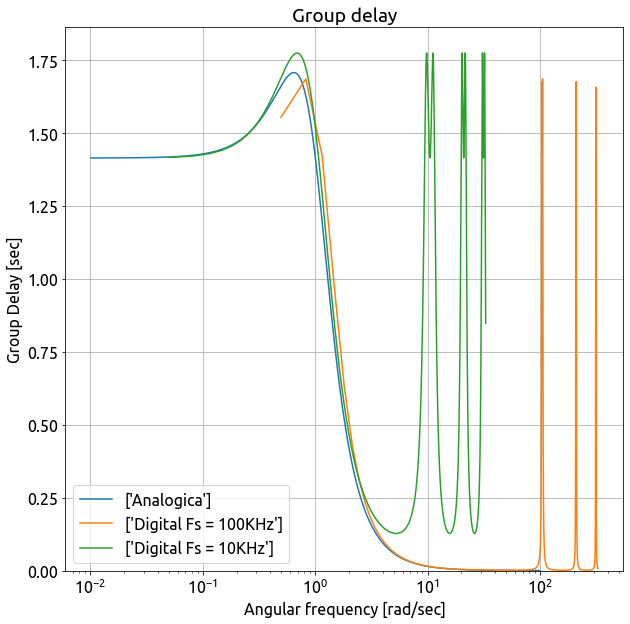

In [52]:
fc = 6e3
wo = 2*np.pi*fc
norm_w = wo
norm_f = fc
fsampling_1 = 100e3
fsampling_2 = 10e3

wo_norm = wo/norm_w
fsampling_1_norm = fsampling_1/norm_f
fsampling_2_norm = fsampling_2/norm_f

q_butter = 1/np.sqrt(2)

num = [wo_norm,0,0]
den = [1,wo_norm/q_butter,wo_norm**2]

tf_analogica = sig.TransferFunction(num,den)
pretty_print_lti(tf_analogica)

numz_1, denz_1 = sig.bilinear(num, den, fs=fsampling_1_norm)
tf_digital_1 = sig.TransferFunction(numz_1,denz_1,dt=1/fsampling_1_norm)

numz_2, denz_2 = sig.bilinear(num, den, fs=fsampling_2_norm)
tf_digital_2 = sig.TransferFunction(numz_2,denz_2,dt=1/fsampling_2_norm)


analyze_sys([tf_analogica,tf_digital_1,tf_digital_2],['Analogica','Digital Fs = 100KHz','Digital Fs = 10KHz'])

### Conclusiones Filtros digitales ejericio 2:
##### PasaBajos: Ambos filtros digitales pudieron seguir la transferencia analogica, las diferencias entre las distintas frecuencias de muestreo se ven primero en el diagrama de polos que a mayor Fs mas cerca del radio unitario. Tambien se comprueba que al ser pasabajos los dos ceros se encuentran en -1.
#### PasaAltos: Otra vez ambos filtros siguieron al analogico, esto igual no quiere decir que el filtro vaya a funcionar correctamente. Porque en el caso de la Fs = 10KHz, voy a tener problema de Aliasing, ya que al ser un pasa altos de 6KHz todas las señales que pasen van a presentar interferencia luego del muestreo y va a ser irrecuperable la informacion. Por el otro lado la de mayor frecuencia de muestreo vamos a tener cuidado con las frecuencias mas altas (hasta 50KHz por Alias) en el aspecto de que van a estar muy compactadas por la propia transformacion al plano $Z$. Si dentro de nuestra señal hay alguna frecuencia muy importante y queremos que este en el mismo punto en ambos planos vamos a tener que hacer Pre-Warping

## Consigna Filtros Digitales - TP5 Eje3:
<img src="./consigna_3.png" align="left"  />

In [54]:
IFrame("./Analisis_TP5_Eje3.pdf", width=900, height=1000)